In [4]:
import torch
import torch.autograd as autograd
import numpy as np
import torch.nn.functional as F
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

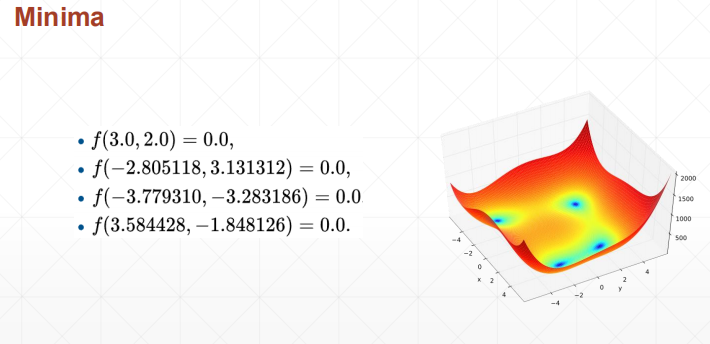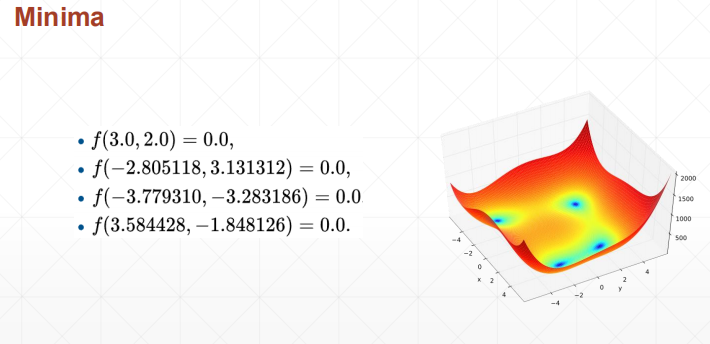

x,y range: (120,) (120,)
X,Y maps: (120, 120) (120, 120)


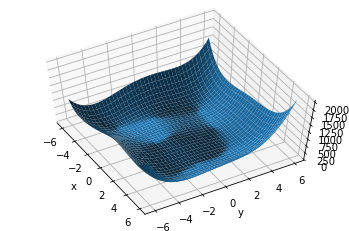

In [5]:
def himelblau(x):
    return (x[0]**2+x[1]-11)**2+(x[0]+x[1]**2-7)**2

x = np.arange(-6, 6, 0.1)
y = np.arange(-6, 6, 0.1)
print('x,y range:', x.shape, y.shape)
X, Y = np.meshgrid(x, y)
print('X,Y maps:',X.shape, Y.shape)
Z = himelblau([X, Y])

fig = plt.figure('himelblau')
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z)
ax.view_init(60, -30)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

In [8]:
x = torch.tensor([0.,  0.], requires_grad=True)
optimizer = torch.optim.Adam([x], lr=1e-3)
for step in range(20000):
    pred = himelblau(x)
    optimizer.zero_grad()
    pred.backward()
    optimizer.step()
    
    if step%2000==0:
        print('step {}: x = {}, f(x) = {}'
             .format(step, x.tolist(), pred.item()))

step 0: x = [0.0009999999310821295, 0.0009999999310821295], f(x) = 170.0
step 2000: x = [2.3331806659698486, 1.9540694952011108], f(x) = 13.730916023254395
step 4000: x = [2.9820079803466797, 2.0270984172821045], f(x) = 0.014858869835734367
step 6000: x = [2.999983549118042, 2.0000221729278564], f(x) = 1.1074007488787174e-08
step 8000: x = [2.9999938011169434, 2.0000083446502686], f(x) = 1.5572823031106964e-09
step 10000: x = [2.999997854232788, 2.000002861022949], f(x) = 1.8189894035458565e-10
step 12000: x = [2.9999992847442627, 2.0000009536743164], f(x) = 1.6370904631912708e-11
step 14000: x = [2.999999761581421, 2.000000238418579], f(x) = 1.8189894035458565e-12
step 16000: x = [3.0, 2.0], f(x) = 0.0
step 18000: x = [3.0, 2.0], f(x) = 0.0
